# Week 3

## Overview

This week we'll be getting into the principles of machine learning, while starting to get to know the dataset. The lecture will feature an overview of fundamentals of machine learning (videos by our resident machine learning expert Ole Winter), and we'll (_finally_) start working on getting to know the dataset we'll be crunching over the next few weeks.

Don't forget that the overarching goal of the class is to do _predictive policing_ in the style of the tv-show [_NUMB3ERS_](https://www.youtube.com/watch?v=dSOrAQMXTcc) or Minority Report. In order to do that, however, we need to understand the patterns in the crime dataset. That's what we'll be doing today.

* Part 1 of today's exercises will be about getting data.
* Part 2 is the "main course", where we'll be playing around with real data, plotting and counting.
* Part 3 is about machine learning, featuring a couple of videos with Ole Winter from DTU Compute and some simple questions from the book.
* In Part 4, we plot a little bit of the detailed GPS data.

## Part 1: Getting the dataset (DSFS Chapter 9)

There's no data science without data, so we'll start thinking about ways to acquire data. You've already played around with reading/writing text from files and the exercises today focus on CSV files. For other types of data access, I recommend that you skim this chapter so you have a place to come back to when you need to scrape the web or use various APIs.

> _Reading_: Skim DSFS Chapter 9 and pay extra attention to the part about CSV files.  
  
---  

> _Exercise_: Reading in crime-data from San Francisco
>  
> * Head over to the [SF OpenData page](https://data.sfgov.org), click on the link to _Public Safety_ data and then choose _SFPD Incidents_. Figure out how to download the list of incidents containing _every crime registered since January 1st, 2003_ as a CSV file by clicking around the page.

** An example of how to read a CSV file**
There are many ways to read in CSV files - here's how I usually do it

```
from csv import reader                          # get the csv reader
infile = open("/path-to-file/file.csv", 'r')    # open the file for reading

for line in reader( infile ):                   # read through the CSV one line at a time
    var1, var2, ..., varN = line                # assign the various fields in the line to variables
```

In [1]:
%matplotlib inline 
import pandas as pd
import json
import urllib2
import cPickle as pickle
from collections import Counter
from collections import defaultdict
from collections import OrderedDict
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import geoplotlib as gp
from geoplotlib.utils import BoundingBox

In [ ]:
with open('data.p', 'rb') as fp:
    data = pickle.load(fp)
    
incidents=pd.read_json(data)
print len(incidents)

In [3]:
df_inc=pd.read_csv('SFPD_Incidents_-_from_1_January_2003.csv')

> * What is the total number of incidents in the CSV file?

In [34]:
print len(df_inc)

2023865


> * Once the file has been downloaded you should read it into Python. The file has may column, and today we'll be working with 
>   - The various categories of crimes
>   - Crime over the years
>   - What time of day do crimes occur?
>   - And do certain crime-types tend to happen in specific neighborhoods?
>   - We'll play around with geo-data. 
> 
>   All of this can be easily based on the columns in the incident file. Which columns will you need?

## Part 2: Working with data (DSFS Chapter 10)

Once again, the book should be thought of as a useful reference, but today we'll be doing our own datascience rather than following the book slavishly. 

In order to do awesome _predictive policing_ later on in the class, we're going to dissect the SF crime-data quite thoroughly to figure out what has been going on over the last 10 years on the San Francisco crime scene. It's going to be a lot of work ... but after mastering these exercises you guys will have some real data science skills! 

> _Reading_: Skim DSFS Chapter 10 so you have a sense of what's in there.

---

>   ![Histogram](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/categoryhist.png)

>    _Little note_: As with anything in Python there are many ways of doing everything. A nice choice for counting things like these is `pandas` which give you a neat way of handling tables in Python. But I've created everything I needed for today simply using standard dictionaries for keeping track of my counts.

> _Exercise_: The types of crime and their popularity over time. The first field we'll dig into is the column "Category".
> * Create a `set()` of all the categories of crime in the dataset. How many are there? 

In [37]:
print "columns are ",df_inc.columns.values

columns are  ['IncidntNum' 'Category' 'Descript' 'DayOfWeek' 'Date' 'Time' 'PdDistrict'
 'Resolution' 'Address' 'X' 'Y' 'Location' 'PdId']


In [44]:
crimes_set=set(Counter(df_inc['Category']).keys())
print "Crimes set"
print crimes_set

Crimes set
set(['KIDNAPPING', 'WEAPON LAWS', 'SECONDARY CODES', 'WARRANTS', 'LOITERING', 'EMBEZZLEMENT', 'SEX OFFENSES, NON FORCIBLE', 'FRAUD', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'STOLEN PROPERTY', 'SUSPICIOUS OCC', 'RECOVERED VEHICLE', 'ASSAULT', 'FORGERY/COUNTERFEITING', 'BAD CHECKS', 'PORNOGRAPHY/OBSCENE MAT', 'GAMBLING', 'OTHER OFFENSES', 'DRUNKENNESS', 'SUICIDE', 'ARSON', 'SEX OFFENSES, FORCIBLE', 'DRUG/NARCOTIC', 'TRESPASS', 'PROSTITUTION', 'VANDALISM', 'MISSING PERSON', 'LIQUOR LAWS', 'TREA', 'VEHICLE THEFT', 'EXTORTION', 'BRIBERY', 'FAMILY OFFENSES', 'NON-CRIMINAL', 'DISORDERLY CONDUCT', 'RUNAWAY', 'LARCENY/THEFT'])


In [ ]:
plt.hist()

> * Now count the number of occurrences of each category in the dataset. What is the most commonly occurring category of crime? What is the least frequently occurring?

In [51]:
crimes_count=Counter(df_inc['Category'])
print "Most common one "
print crimes_count.most_common(1)
print "Least common one "
print crimes_count.most_common()[-1]

Most common one 
[('LARCENY/THEFT', 422170)]
Least common one 
('TREA', 13)


> * Create a histogram over crime occurrences.

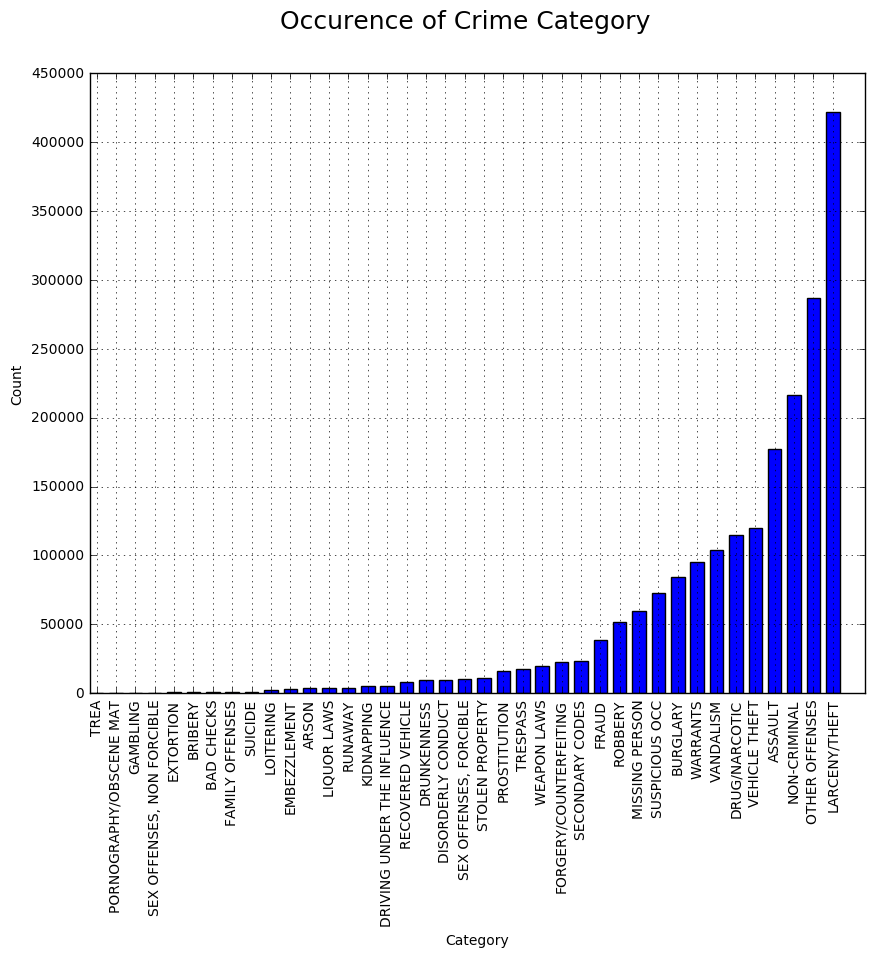

In [102]:
sorted_crimes_count=sorted(crimes_count.items(), key=lambda i: i[1])
sorted_keys=[item[0] for item in sorted_crimes_count]
sorted_values=[item[1] for item in sorted_crimes_count]

fig = plt.figure(num=None, figsize=(10, 8), dpi=150, facecolor='w', edgecolor='k')
fig.suptitle('Occurance of Crime Category', fontsize=18)

indexes = np.arange(len(sorted_keys))
width = 0.7

plt.bar(indexes, sorted_values, width)
plt.xticks(indexes+width*0.5,sorted_keys, rotation='vertical')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [277]:
print sum(sorted_values)

2023865


> * Now it's time to explore how the crime statistics change over time. To start off easily, let's count the number of crimes per year for the years 2003-2016 (the full years in the database). For that one, I used the `date` column in the CSV file and used `year = int( date.split("/")[-1] )` to extract the year of each crime. What's the average number of crimes per year? 

In [119]:
crime_per_year=OrderedDict()
for year in range(2003,2017):
    crime_per_year[year]= len(df_inc[df_inc.Date.str.contains(str(year))])


In [125]:
print "crime count per year"
print crime_per_year
print "Average per year"
print sum(crime_per_year.values())/13

crime count per year
OrderedDict([(2003, 149176), (2004, 148148), (2005, 142186), (2006, 137853), (2007, 137639), (2008, 141311), (2009, 139860), (2010, 133523), (2011, 132697), (2012, 140854), (2013, 152806), (2014, 150131), (2015, 156543), (2016, 149502)])
Average per year
154786


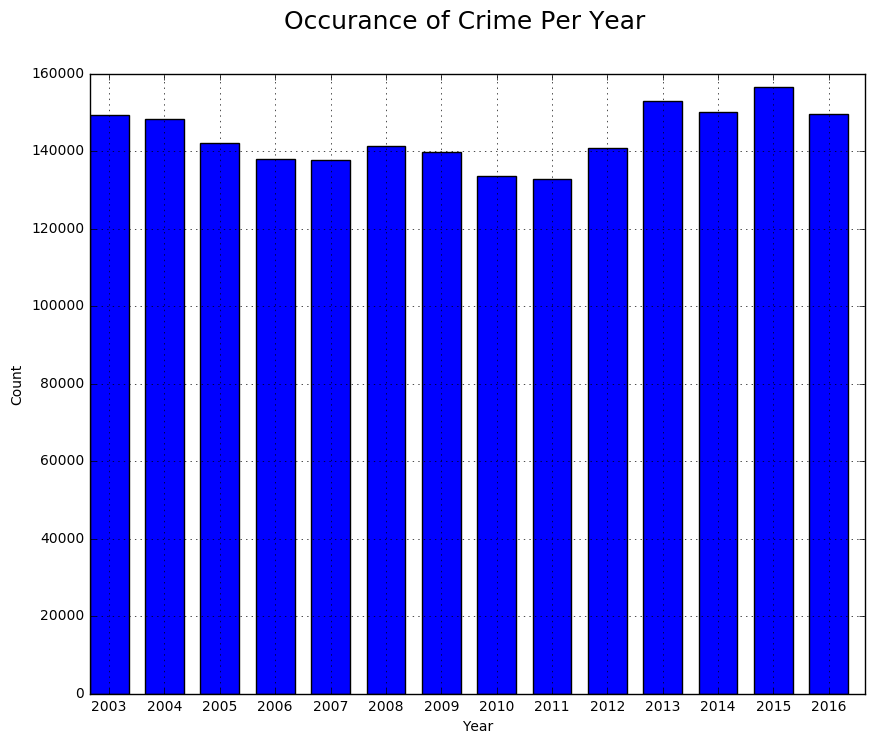

In [134]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=150, facecolor='w', edgecolor='k')
fig.suptitle('Occurance of Crime Per Year', fontsize=18)

year_keys=crime_per_year.keys()
year_values=crime_per_year.values()
indexes = np.arange(len(year_keys))
width = 0.7

plt.bar(indexes, year_values, width)
plt.xticks(indexes+width*0.5,year_keys)
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

> * Police chief Suneman is interested in the temporal development of only a subset of categories, the so-called focus crimes. Those categories are listed below (for convenient copy-paste action). Now create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2016.
> 

In [129]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [183]:
#save focus crime and its crime count per year in a defaultdict
focuscrime_dict=defaultdict(list)
for focuscrime in focuscrimes:
    for year in range(2003,2017):
        crime_in_year = df_inc[(df_inc['Date'].str.contains(str(year))) & (df_inc['Category']==focuscrime)]
        focuscrime_dict[focuscrime].append(len(crime_in_year))

In [185]:
print focuscrime_dict

defaultdict(<type 'list'>, {'WEAPON LAWS': [1281, 1252, 1341, 1324, 1318, 1419, 1433, 1349, 1329, 1460, 1535, 1580, 1655, 1651], 'ROBBERY': [3204, 3380, 3566, 4131, 4027, 4229, 3578, 3324, 3376, 3955, 4196, 3420, 3759, 3293], 'PROSTITUTION': [1952, 1527, 1103, 1290, 1873, 1673, 1468, 1299, 1094, 690, 692, 449, 374, 640], 'DRUG/NARCOTIC': [9917, 9897, 8533, 9069, 10560, 11648, 11950, 9205, 6935, 6444, 6775, 5408, 4254, 4228], 'TRESPASS': [1434, 1191, 1034, 1102, 1198, 1151, 1232, 1150, 1072, 1288, 1129, 1125, 1403, 1807], 'ASSAULT': [13461, 12899, 11601, 12449, 12518, 12681, 12284, 12387, 12279, 12181, 12580, 12402, 13115, 13522], 'STOLEN PROPERTY': [800, 641, 540, 575, 527, 518, 660, 680, 785, 932, 1224, 1084, 959, 878], 'DRIVING UNDER THE INFLUENCE': [289, 244, 196, 266, 313, 408, 579, 458, 470, 421, 448, 381, 430, 369], 'VEHICLE THEFT': [15325, 17884, 18194, 7291, 6460, 6053, 5183, 4346, 4762, 6183, 6241, 7108, 7946, 6398], 'VANDALISM': [6448, 6496, 7013, 7688, 7566, 7342, 7604, 7934

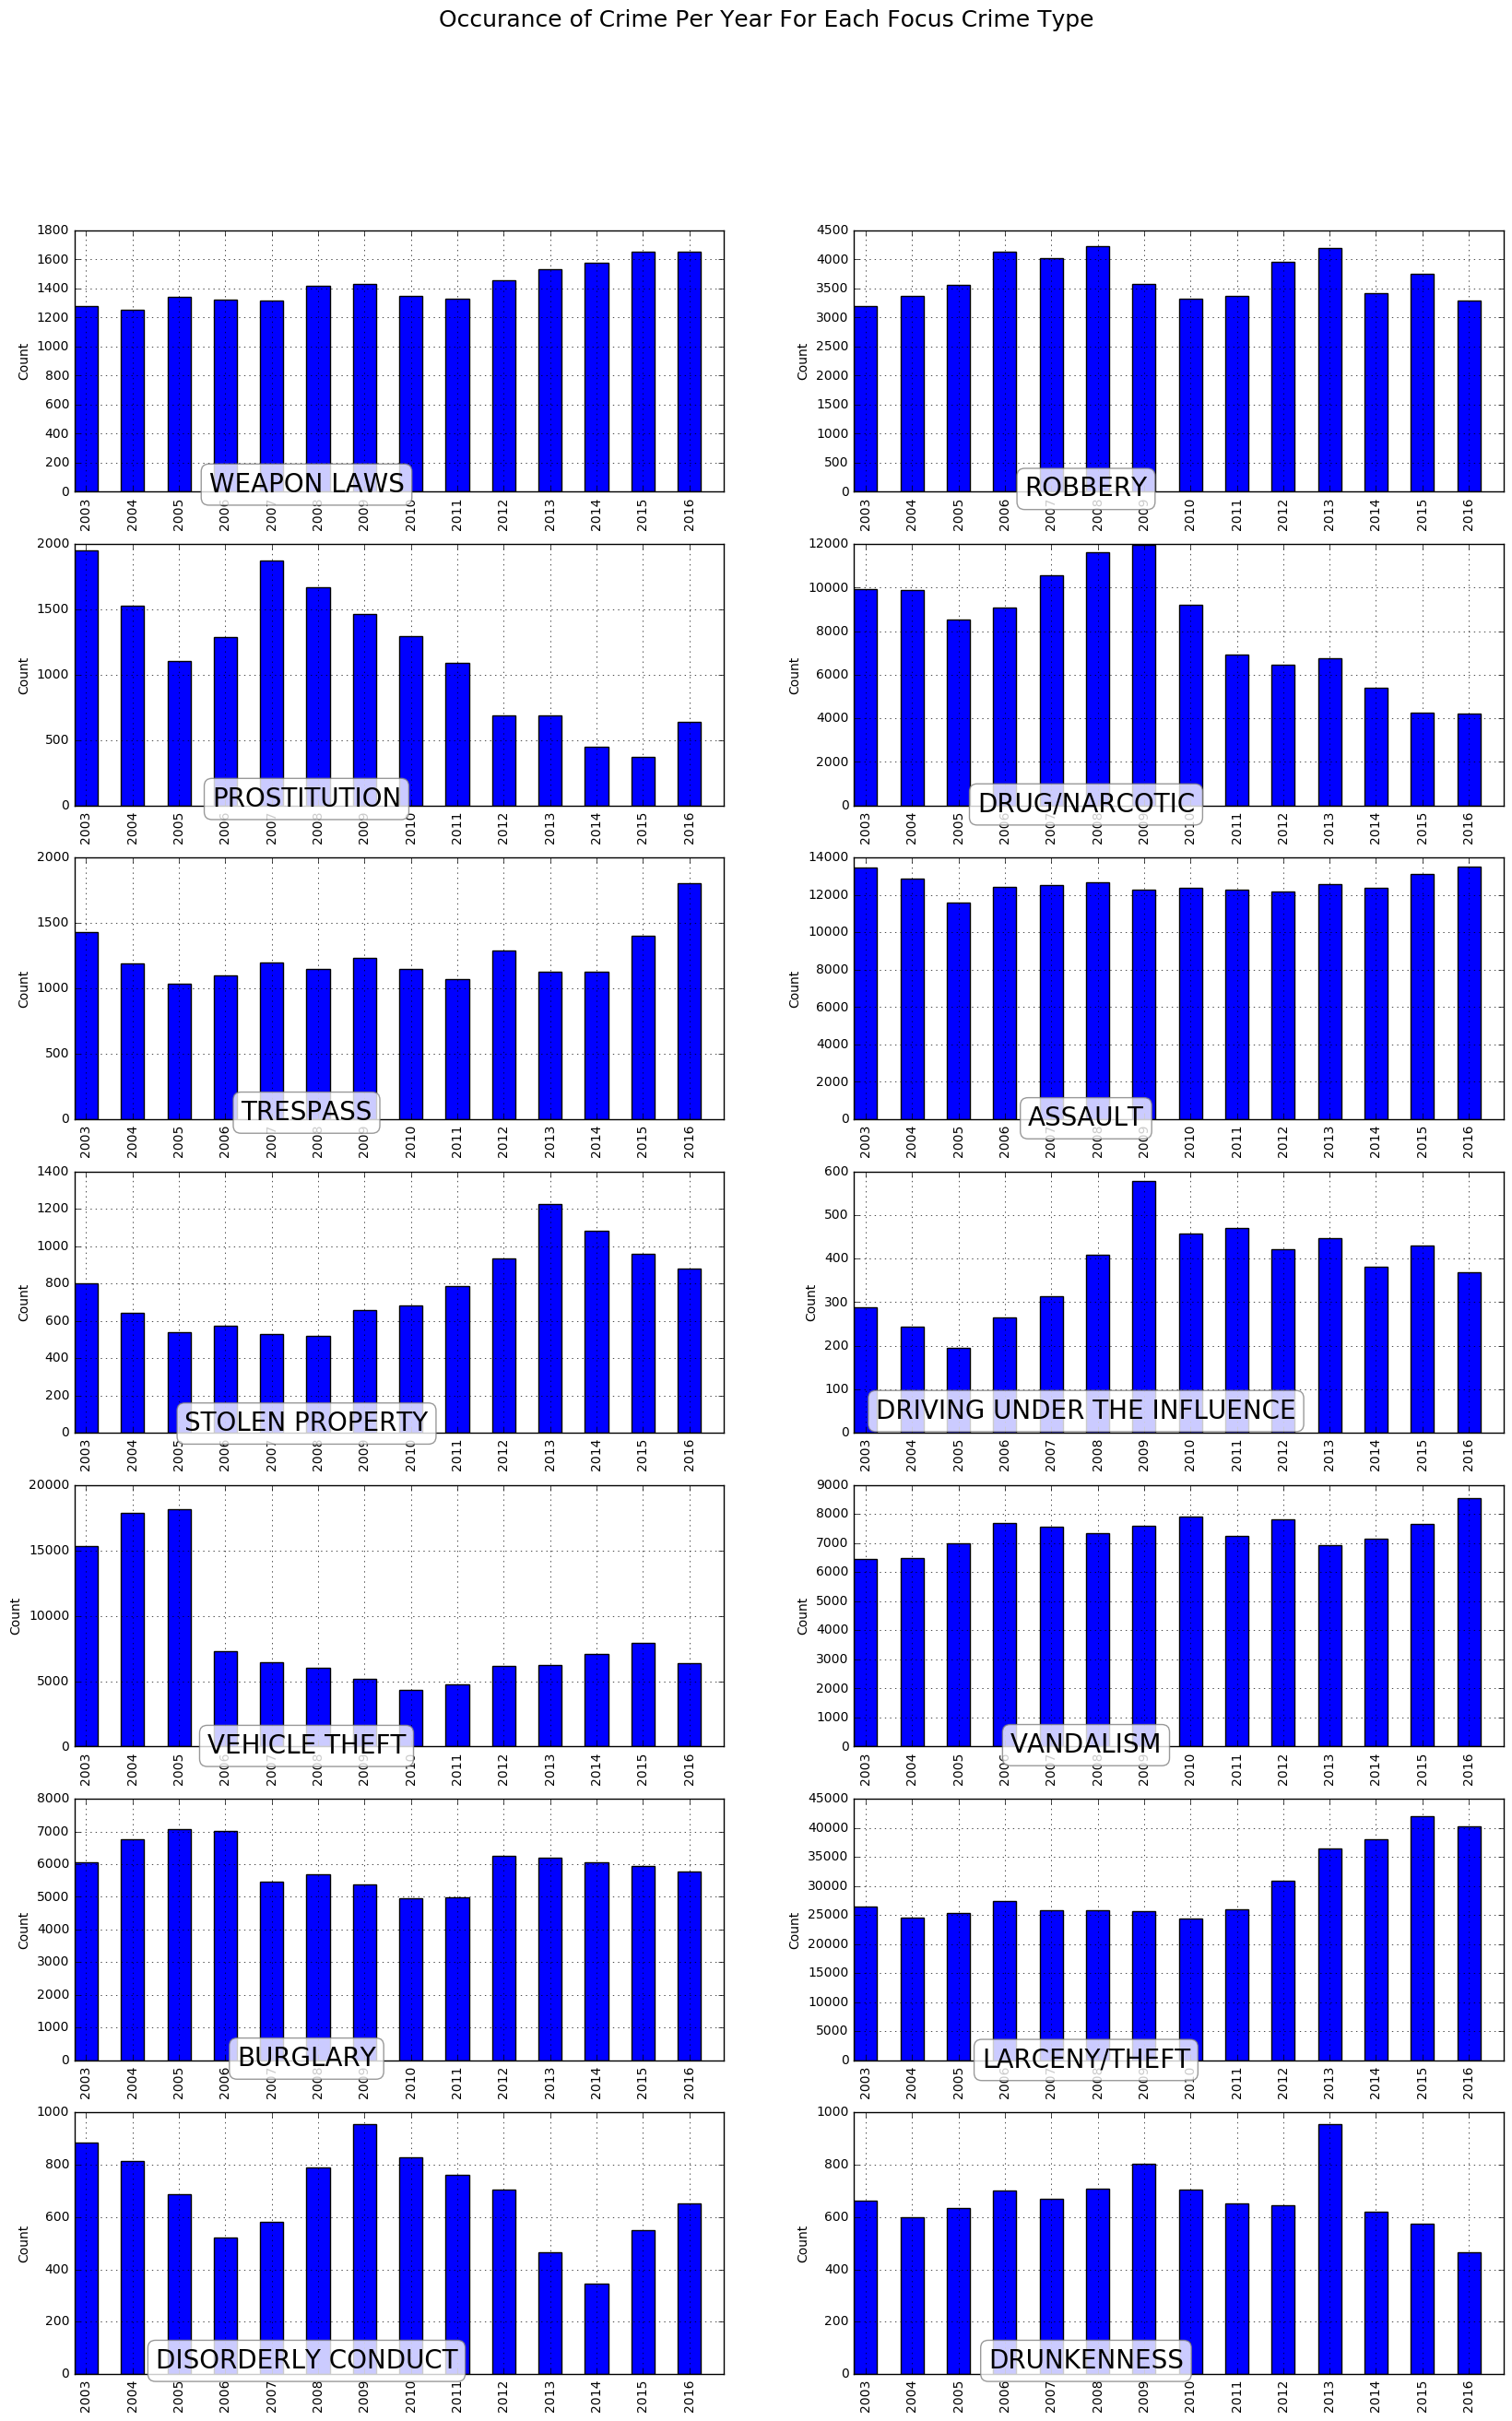

In [186]:
fig = plt.figure(num=None, figsize=(20, 30), dpi=150, facecolor='w', edgecolor='k')
fig.suptitle('Occurance of Crime Per Year For Each Focus Crime Type', fontsize=18)
i=1
for crime, counts in focuscrime_dict.iteritems():
    ax = fig.add_subplot(7,2,i)
    years=range(2003,2017)
    year_values=counts
    indexes = np.arange(len(years))
    width = 0.5
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.8)
    ax.text(5, 50, crime, ha="center", va="center", size=20,bbox=bbox_props)
    plt.bar(indexes, year_values, width)
    plt.xticks(indexes+width*0.5,years, rotation="vertical")
    plt.ylabel('Count')
    plt.grid(True)
    i=i+1
    
plt.show()


> * My plot looks like this for the 14 focus crimes (my plot were generated in 2016, so there are no values for that year):
    ![Histograms](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/temporal_categories.png)
>    
> Comment on at least three interesting trends in your plot. 
>    
> Also, here's a fun fact: The drop in car thefts is due to new technology called 'engine immobilizer systems' - get the full story [here](https://www.nytimes.com/2014/08/12/upshot/heres-why-stealing-cars-went-out-of-fashion.html). 
    
    

Ok, now we're getting warmed up. The next exercise looks at the focus crimes, and their temporal patterns across the day. It's interesting to know if some crimes tend to happen during the day ... and if others take during the night time. By knowing _when_ certain types of crimes happen, we can more efficiently fight them!
    ![Histograms](https://raw.githubusercontent.com/suneman/socialdataanalysis2016/master/files/daily_patterns_categories.png)

> _Exercises_: The types of crime and their popularity across the 24 hours of the day.
> 
> * First, plot a simple histogram of the number of crimes per hour in the dataset. This piece of information is in the _Time_ column of the CSV file, and I simply used `hr = int( time.split(":")[0] )` to get this info out. There's a little strange peak at `12:00` - what do you think is going on there? (No need for a serious exploration, just some thoughts on what might be going on).
> * Next create a plot of the count of each crime category across the 24 hours of the day. Again, comment on at least three trends in the data. (My plot looks like this)

In [187]:
focuscrime_daydict=defaultdict(list)
#print df_inc[df_inc.Time.str[0:2].str.contains("14")] 
for focuscrime in focuscrimes:
    for hour in range(0,24):
        crime_in_hour = df_inc[(df_inc.Time.str[0:2].str.contains(str(hour).zfill(2))) & (df_inc['Category']==focuscrime)]
        focuscrime_daydict[focuscrime].append(len(crime_in_hour))


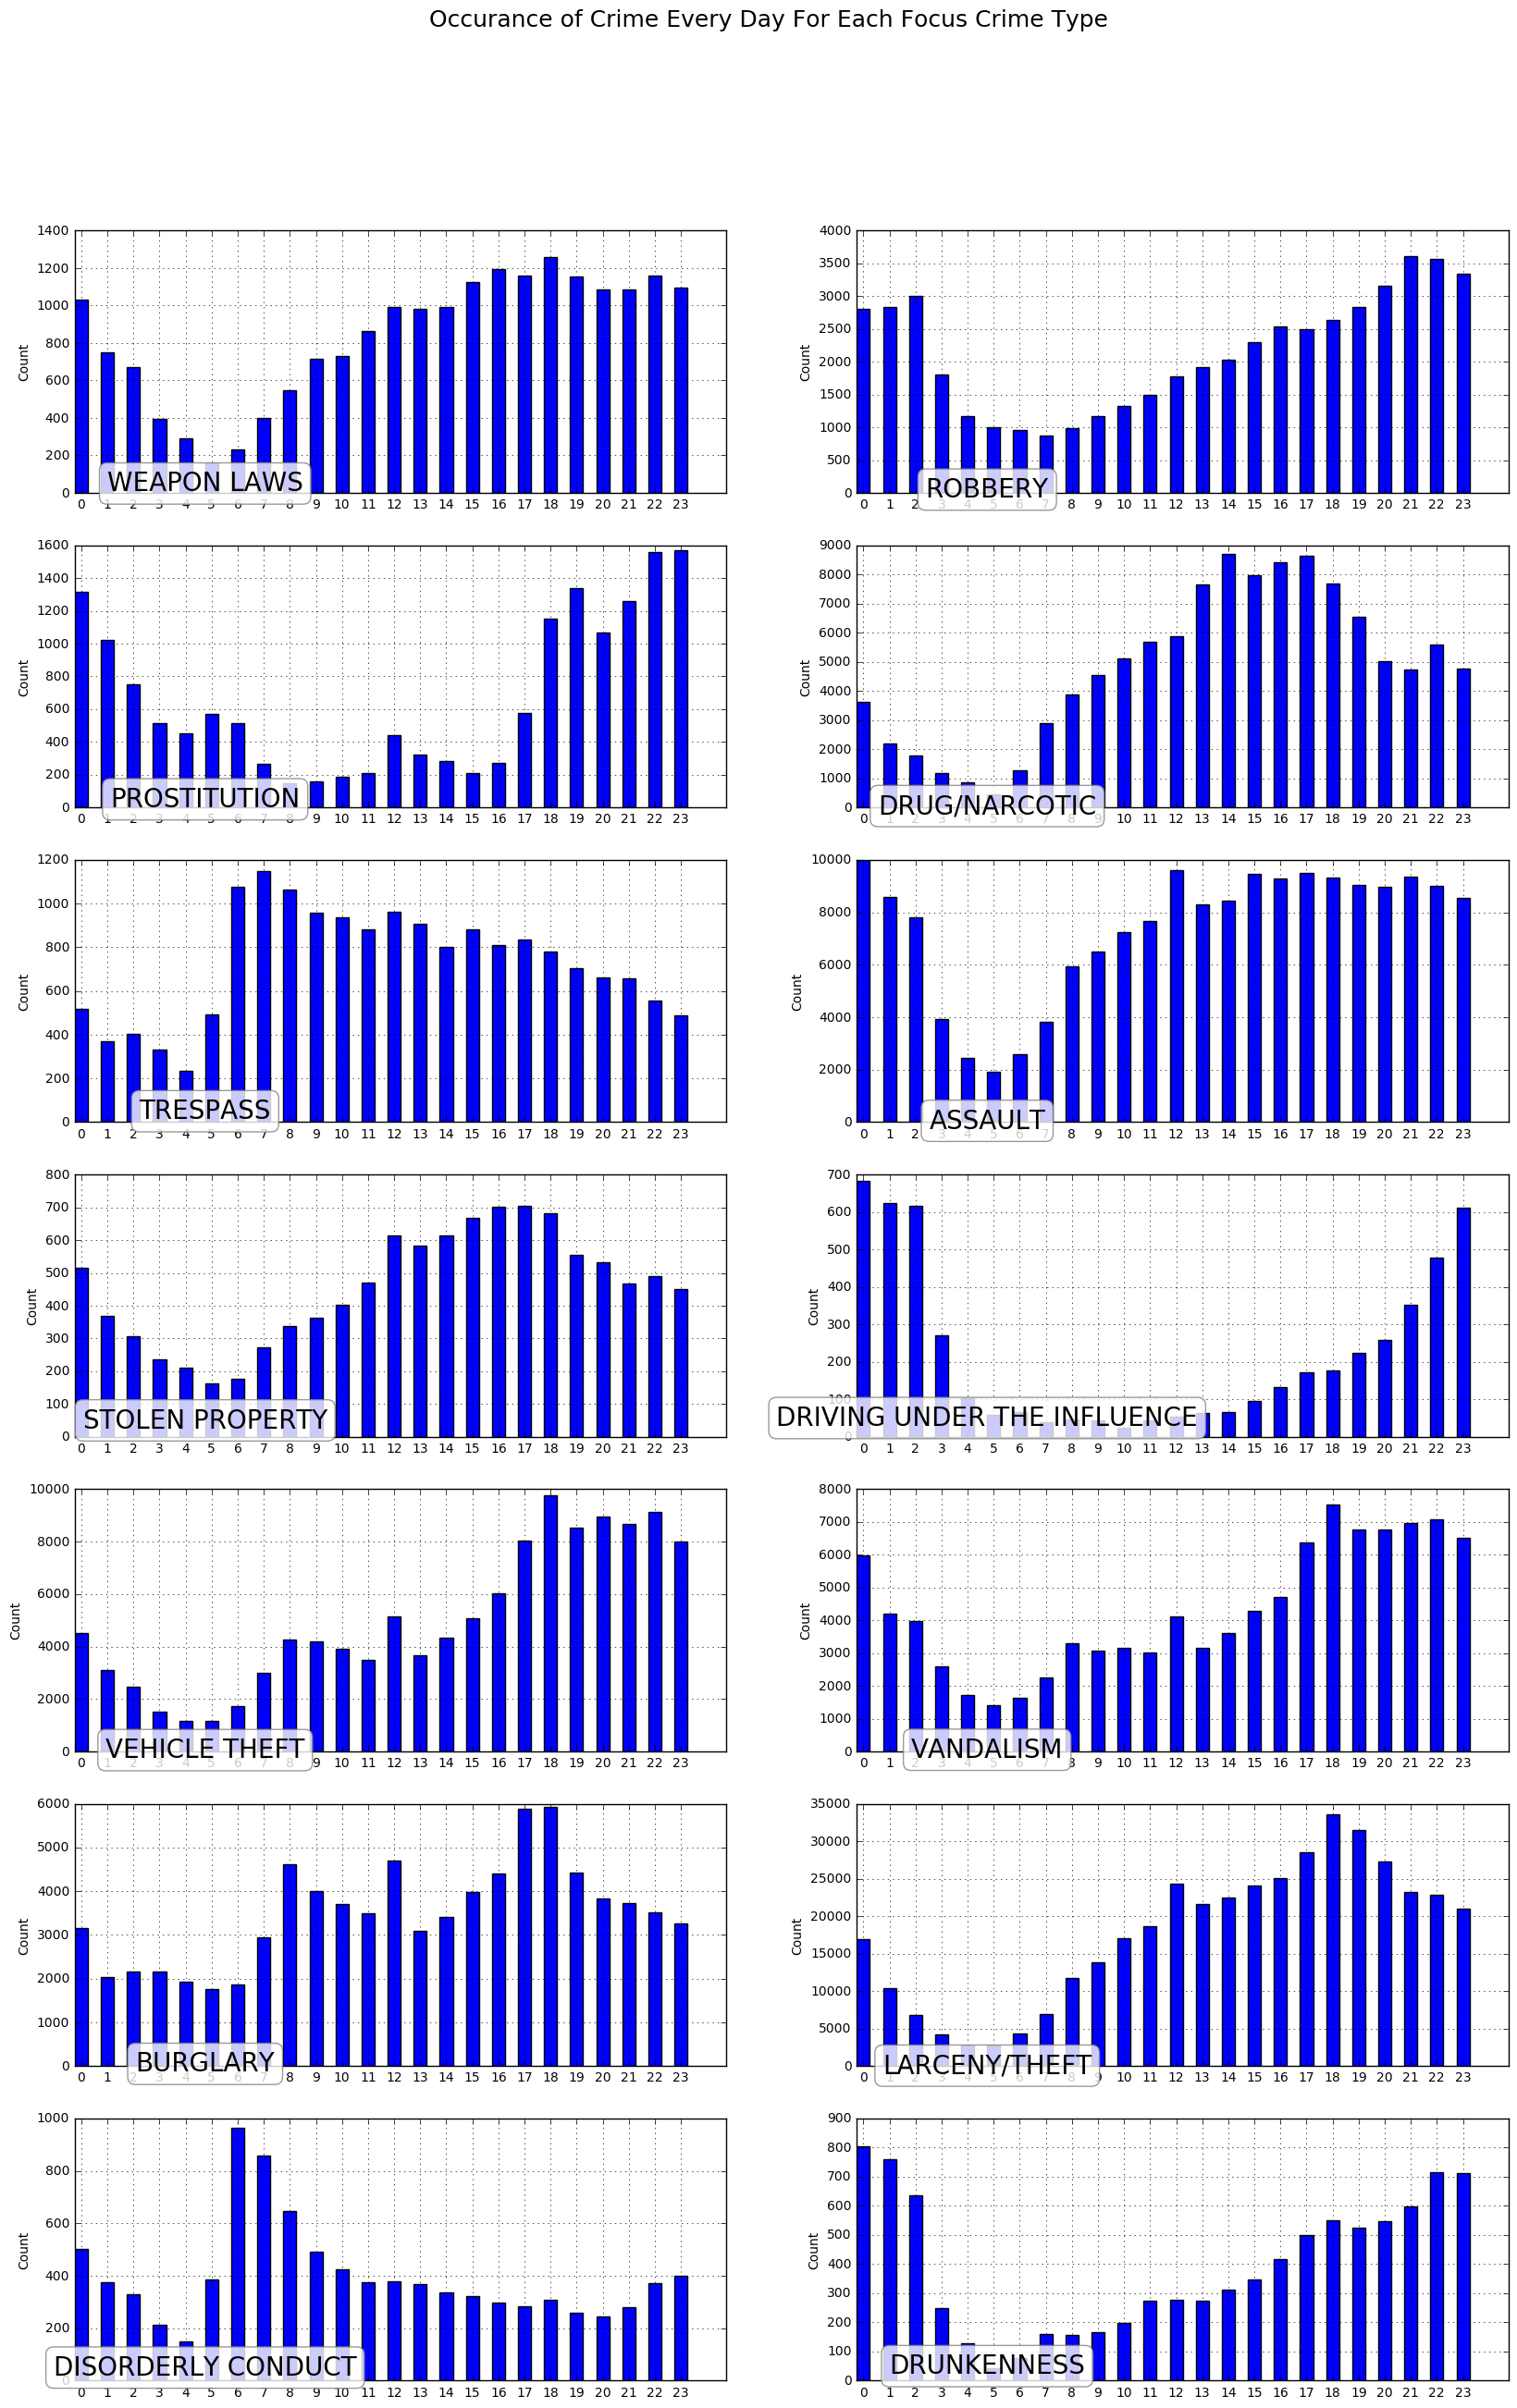

In [254]:
fig = plt.figure(num=None, figsize=(20, 30), dpi=150, facecolor='w', edgecolor='k')
fig.suptitle('Occurance of Crime Every Day For Each Focus Crime Type', fontsize=18)
i=1
for crime_day, counts in focuscrime_daydict.iteritems():
    ax = fig.add_subplot(7,2,i)
    hours=range(0,24)
    day_values=counts
    indexes = np.arange(len(hours))
    width = 0.5
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.8)
    ax.text(5, 50, crime_day, ha="center", va="center", size=20,bbox=bbox_props)
    plt.bar(indexes, day_values, width)
    plt.xticks(indexes+width*0.5,hours)
    plt.ylabel('Count')
    plt.grid(True)
    i=i+1
    
plt.show()


There's much more to work on in this dataset (for example, I also explored if certain crimes tend to happen on certain week-days ... [also some interesting patterns there!](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/weekdays.png)), but we have lots to do, so we must rush onwards. 

The next thing we'll be looking into is how crimes break down across the 10 districts in San Francisco.

> _Exercises_: The types of crime and how they take place across San Francisco's police districts.
>  


>  * So now we'll be combining information about _PdDistrict_ and _Category_ to explore differences between SF's >neighborhoods. First, simply list the names of SF's 10 police districts.

In [191]:
print df_inc['PdDistrict'].unique()

['MISSION' 'TENDERLOIN' 'NORTHERN' 'RICHMOND' 'BAYVIEW' 'CENTRAL' 'PARK'
 'TARAVAL' 'SOUTHERN' 'INGLESIDE' nan]


>  * Which has the most crimes? Which has the most focus crimes?

In [224]:
focuscrime_districtdict=OrderedDict()
district_count=Counter(df_inc['PdDistrict'].dropna())
print "most crimes"
print district_count.most_common(1)
print "most focus crimes"
for key in district_count.keys():
    focuscrime_districtdict[str(key)]=len(df_inc[(df_inc['PdDistrict'].str.contains(str(key))) & (df_inc['Category'].isin(focuscrimes))])
print sorted(focuscrime_districtdict)[0]

most crimes
[('SOUTHERN', 364516)]
most focus crimes
BAYVIEW


>  * Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes >that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going

>    - Comment on the top crimes in _Tenderloin_, _Mission_, and _Richmond_. Does this fit with the impression you get of these neighborhoods on Wikipedia?
>    - Even though we only plotted the ratios for our 14 focus crimes, I asked you to calculate the ratios based on all crime categories. Why do you think I wanted to include all crime types in the calculation?

In [279]:
#First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole
pcrime=OrderedDict()
for sorted_key,sorted_value in zip(sorted_keys, sorted_values):
    pcrime[sorted_key]=sorted_value/len(df_inc)
    print sorted_key, sorted_value/len(df_inc)

TREA 6.42335333631e-06
PORNOGRAPHY/OBSCENE MAT 2.47052051397e-05
GAMBLING 0.000161077937511
SEX OFFENSES, NON FORCIBLE 0.00018578314265
EXTORTION 0.000330555644769
BRIBERY 0.000361684203245
BAD CHECKS 0.000440246755589
FAMILY OFFENSES 0.000557349427951
SUICIDE 0.000591442611044
LOITERING 0.00117695597285
EMBEZZLEMENT 0.00135779807448
ARSON 0.00174122285824
LIQUOR LAWS 0.00197443999476
RUNAWAY 0.00203225017479
KIDNAPPING 0.00250807242578
DRIVING UNDER THE INFLUENCE 0.00261973995301
RECOVERED VEHICLE 0.00397852623569
DRUNKENNESS 0.00466038989755
DISORDERLY CONDUCT 0.00473005857604
SEX OFFENSES, FORCIBLE 0.00513818856495
STOLEN PROPERTY 0.00538079367942
PROSTITUTION 0.00798620461345
TRESPASS 0.0086310104676
WEAPON LAWS 0.00991419882255
FORGERY/COUNTERFEITING 0.0110447090097
SECONDARY CODES 0.0114923673269
FRAUD 0.0189271517616
ROBBERY 0.0255313471995
MISSING PERSON 0.0293784417439
SUSPICIOUS OCC 0.0360676230875
BURGLARY 0.0415131444044
WARRANTS 0.0469181491849
VANDALISM 0.0515108468203
DR

In [235]:
#Next, we calculate that same probability distribution but for each PD district, let's call that P(crime|district).
focuscrime_dict=defaultdict(dict)
for key in district_count.keys():
    for focuscrime in focuscrimes:
        crime_in_dis = df_inc[(df_inc['PdDistrict'].str.contains(str(key))) & (df_inc['Category']==focuscrime)]
        focuscrime_dict[str(key)][focuscrime]=len(crime_in_dis)/focuscrime_districtdict[str(key)]

print focuscrime_dict #crime rate of each type in each district


defaultdict(<type 'dict'>, {'CENTRAL': {'WEAPON LAWS': 0.00914423603559267, 'ROBBERY': 0.03756915725387162, 'PROSTITUTION': 0.014002111429501274, 'DRUG/NARCOTIC': 0.030520475309768934, 'TRESPASS': 0.017264508140116368, 'ASSAULT': 0.12797167826894532, 'STOLEN PROPERTY': 0.010128511442201601, 'DRIVING UNDER THE INFLUENCE': 0.0030322032687468744, 'VEHICLE THEFT': 0.07482080631206293, 'VANDALISM': 0.08633841611036584, 'BURGLARY': 0.08134559973329311, 'LARCENY/THEFT': 0.4907724180630412, 'DISORDERLY CONDUCT': 0.007874203252871465, 'DRUNKENNESS': 0.009215675379620737}, 'NORTHERN': {'WEAPON LAWS': 0.01161330424193221, 'ROBBERY': 0.037992185914349504, 'PROSTITUTION': 0.025116703876598336, 'DRUG/NARCOTIC': 0.06381291861173127, 'TRESPASS': 0.012539324132332047, 'ASSAULT': 0.12213314390095392, 'STOLEN PROPERTY': 0.010420895067992693, 'DRIVING UNDER THE INFLUENCE': 0.0036406535417089505, 'VEHICLE THEFT': 0.08880277044854881, 'VANDALISM': 0.08168002841485691, 'BURGLARY': 0.0835828090115689, 'LARCEN

In [239]:
## ratio of each crime type in each district against total ratio of each crime type 
focuscrime_ratiodict=defaultdict(dict)
for dis ,crime_ratios in focuscrime_dict.iteritems():
    for crime_type in crime_ratios.keys():       
        pratios=crime_ratios[crime_type]/pcrime[crime_type]
        focuscrime_ratiodict[dis][crime_type]=pratios
print focuscrime_ratiodict

defaultdict(<type 'dict'>, {'CENTRAL': {'DISORDERLY CONDUCT': 1.664715801355135, 'WEAPON LAWS': 0.9223373667667459, 'VANDALISM': 1.67612107817868, 'PROSTITUTION': 1.753287338258219, 'DRUG/NARCOTIC': 0.5365133783499275, 'TRESPASS': 2.0002881707692133, 'ASSAULT': 1.4599051933676745, 'DRUNKENNESS': 1.9774472913672734, 'DRIVING UNDER THE INFLUENCE': 1.1574443735387387, 'VEHICLE THEFT': 1.2637469218751105, 'ROBBERY': 1.4714913772566742, 'BURGLARY': 1.9595142912056045, 'STOLEN PROPERTY': 1.8823452534408949, 'LARCENY/THEFT': 2.352742070453033}, 'NORTHERN': {'DISORDERLY CONDUCT': 1.4763463660480305, 'WEAPON LAWS': 1.1713810111935277, 'VANDALISM': 1.5856859954133236, 'PROSTITUTION': 3.1450113154248402, 'DRUG/NARCOTIC': 1.1217546319074054, 'TRESPASS': 1.4528222598512823, 'ASSAULT': 1.3932989976782433, 'DRUNKENNESS': 1.0656313026581214, 'DRIVING UNDER THE INFLUENCE': 1.3897003546191598, 'VEHICLE THEFT': 1.4999066882582142, 'ROBBERY': 1.4880603681983464, 'BURGLARY': 2.0134058792887024, 'STOLEN PRO

>    - First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. > That's simply a normalized version of [this plot](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/categoryhist.png). Let's call it `P(crime)`.
>    - Next, we calculate that same probability distribution _but for each PD district_, let's call that `P(crime|district)`.
>    - Now we look at the ratio `P(crime|district)/P(crime)`. That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs _more frequently_ within that district. If it's smaller than one, it means that the crime is _rarer within the district in question_ than in the city as a whole.
>    - For each district plot these ratios for the 14 focus crimes. My plot looks like this
>      ![Histograms](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/neighborhood_ratios.png)

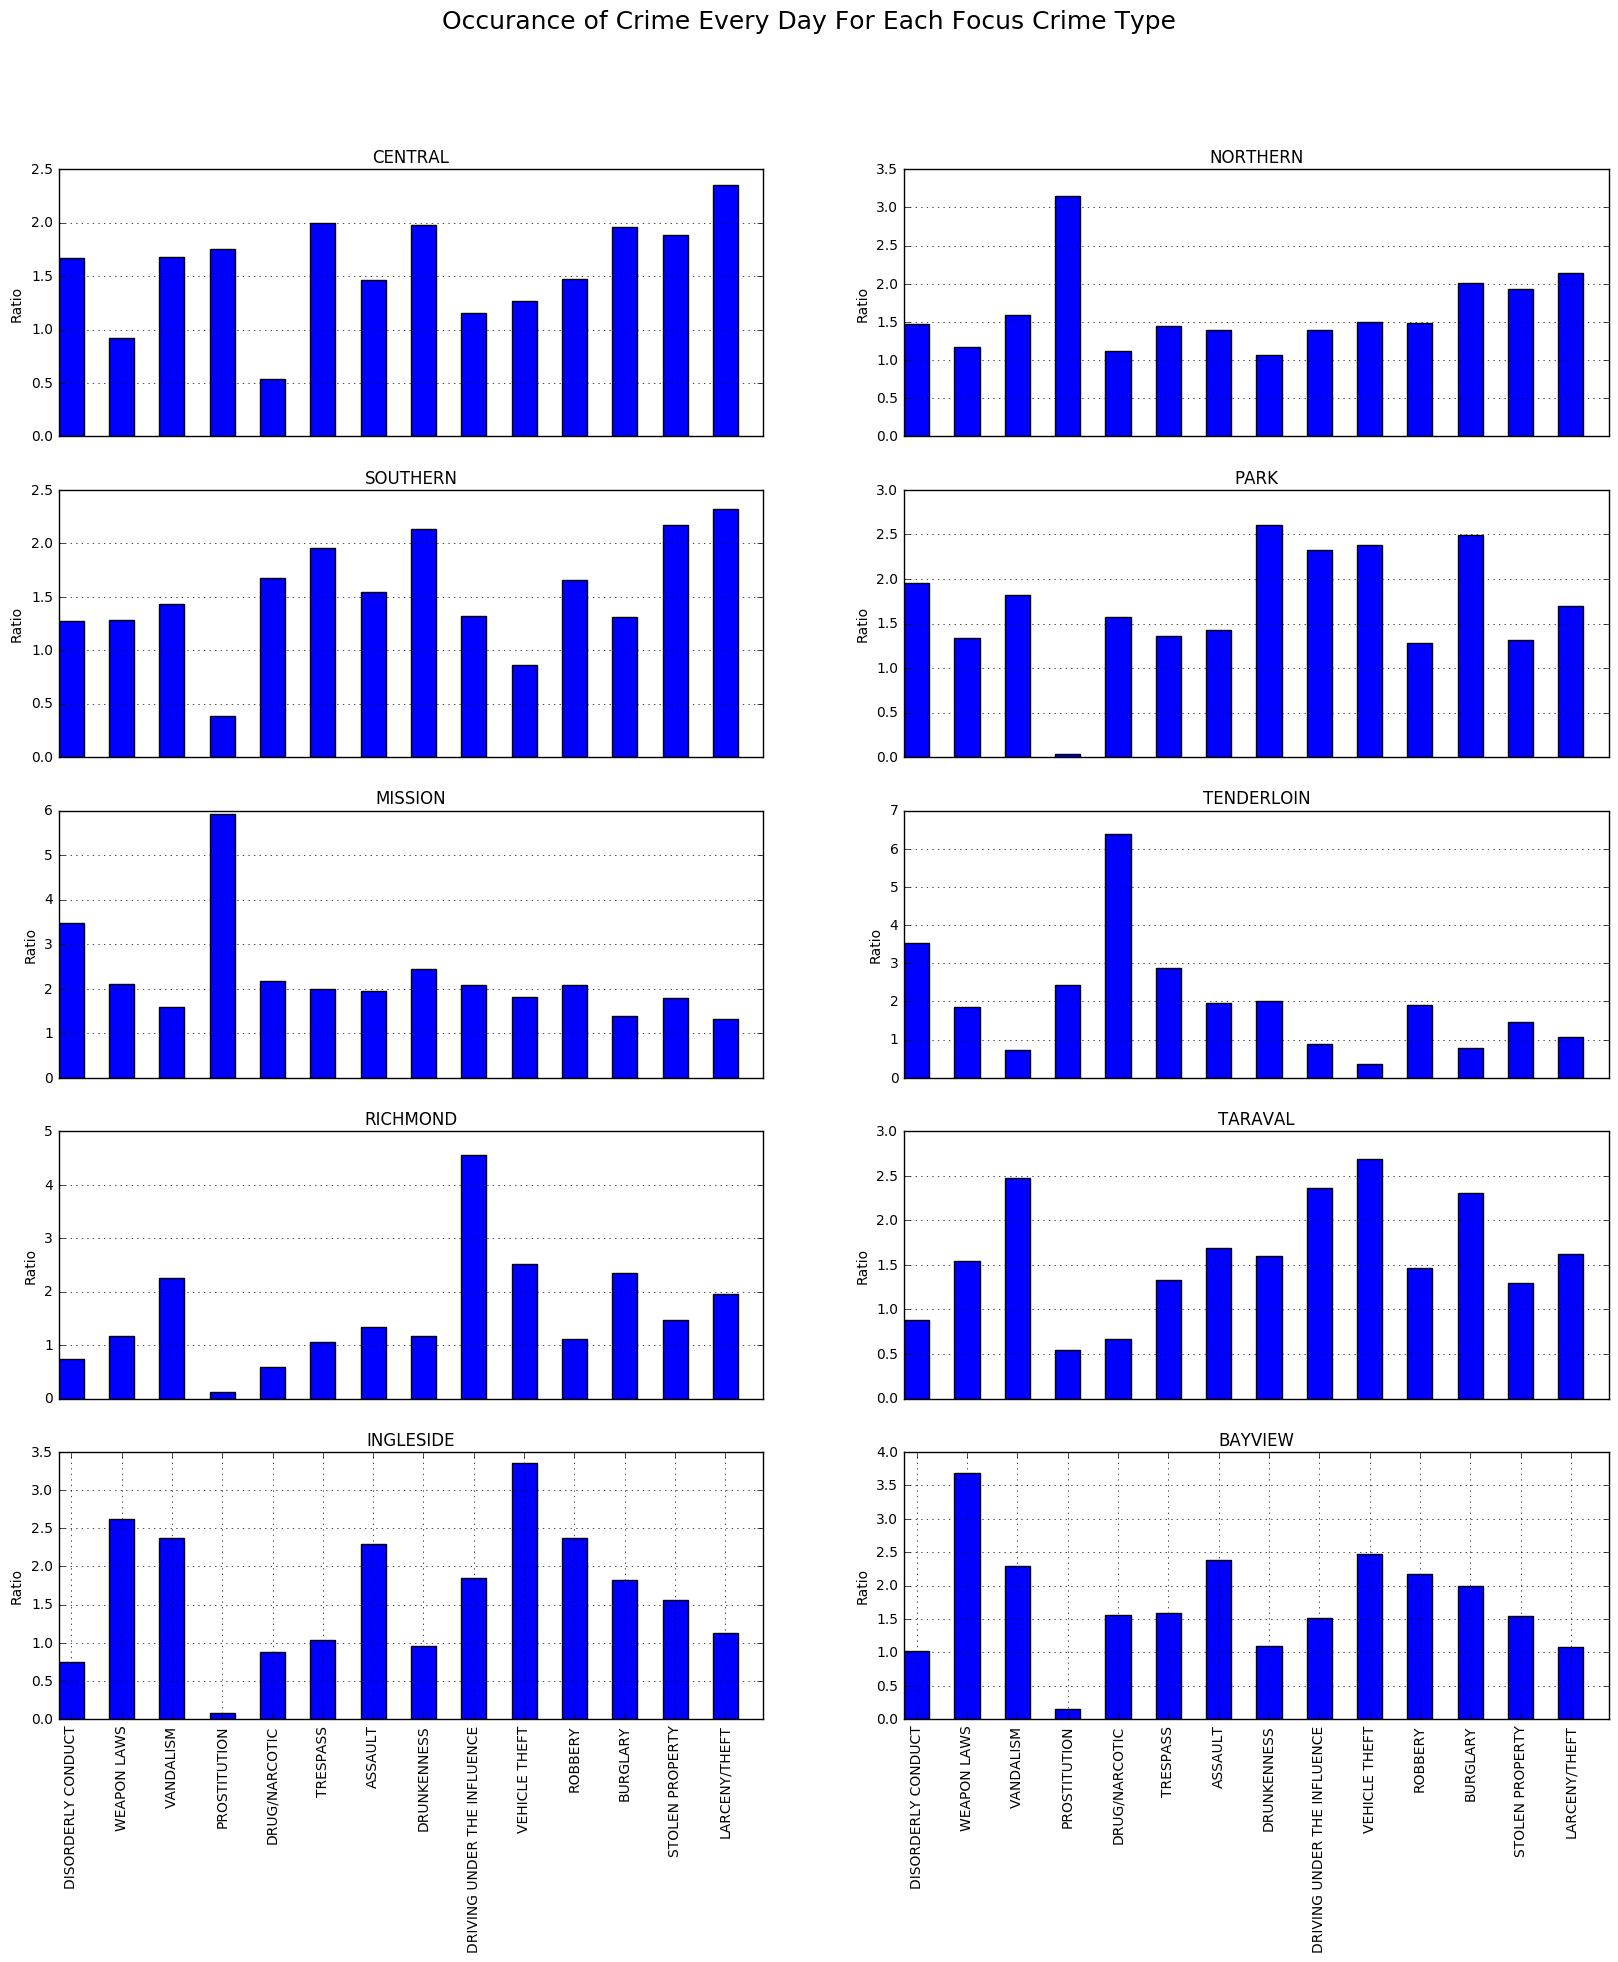

In [274]:
fig = plt.figure(num=None, figsize=(20, 20), dpi=150, facecolor='w', edgecolor='k')
fig.suptitle('Occurance of Crime Every Day For Each Focus Crime Type', fontsize=18)
i=1
for district, crimes_dict in focuscrime_ratiodict.iteritems():
    ax = fig.add_subplot(5,2,i)
    ax.set_title(district)
    focus_crimes_ratios=crimes_dict.values()
    indexes = np.arange(len(focus_crimes_ratios))
    width = 0.5
    plt.bar(indexes, focus_crimes_ratios, width)
    plt.xticks([])
    if i>=9: #plot x axis on last two graphs
        plt.xticks(indexes+width*0.5,crimes_dict.keys(), rotation="vertical")
    plt.ylabel('Ratio')
    plt.grid(True)
    i=i+1

plt.show()

## Part 3: Machine Learning (DSFS Chapter 11)

We won't go too deep with machine learning today, but after all it's time to watch some video lectures on the fundamentals of Machine learning. The lectures have been prepared by our very own expert, Ole Winter, whose work focuses on Machine Learning. The lectures + slides have been prepared especially for you guys by Ole, and lovingly edited by yours truly.

> _Reading_: DSFS Chapter 11. This covers really important ground in machine learning. Take a close look at the text, and be ready to return to this chapter after trying out some machine learning methods in subsequent lectures.

---

> _Exercises_: A few questions about machine learning. 
> * What do we mean by a 'feature' in a machine learning model?
> * What is the main problem with overfitting?
> * Explain the connection between the bias-variance trade-off and overfitting/underfitting.
> * The `Luke is for leukemia` is a great example of why _accuracy_ is not a good measure in very unbalanced problems. You know about the incidents dataset we've been working with. Try to come up with a similar example based on the data we've been working with today.

## Part 4: A little bit of plotting

There's a lot of rich geo-data in the crime dataset that we haven't explored yet. Recall that every incident in the database also has an associated GPS location. We're not going to dig deep regarding the geodata quite yet, but it's interesting to just start plotting a little bit.

We'll be using the package [`geoplotlib`](https://github.com/andrea-cuttone/geoplotlib) to plot geographical data (it's like `matplotlib` but for geo-data). You can't install geoplotlib using `conda install` since it's not part of the Anaconda framework. But we _do_ want to install `geoplotlib` so that it integrates with Anaconda. The way to do that is to use another package installer called [`pip`](https://en.wikipedia.org/wiki/Pip_(package_manager)). Your system may have multiple versions of `pip` so, it's important that you use the one that comes with Anaconda. On my computer, that file is stored in `~/anaconda/bin`, so to install I simply type

```
>> ~/anaconda/bin/pip install pyglet
>> ~/anaconda/bin/pip install geoplotlib
```  
That first line is there because you need to install a library called pyglet in order for `geoplotlib` to work.

Now that we have the capabilities for plotting, we need to get data in the format that `geoplotlib` requires. Your put your geodata in a dictionary structured as follows.

```
geo_data_for_plotting = {"lat": [list-of-latitudes],
                         "lon": [list of longitudes]}
```

Check out the [user guide](https://github.com/andrea-cuttone/geoplotlib/wiki/User-Guide) and [example gallary](https://github.com/andrea-cuttone/geoplotlib) to see some of the cool things you can do.

**Oh and one last thing**: In order to plot inside your notebook, use `geoplotlib.inline()`

**NOTE**: To get a map only of SF, you need to create your own * BoundingBox * which can be done in the following way:
```
bbox = BoundingBox(north=max_lat, west=min_lon, south=min_lat, east=max_lon)
geoplotlib.set_bbox(bbox)
```

> _Exercise_: Create a kernel density map plot of all crimes from the CSV file.
> Here's my version

> ![Histograms](https://raw.githubusercontent.com/suneman/socialdataanalysis2016/master/files/kde_plot.png)

> Note that there's very bright spot just south of south of market. Check out the map carefully and see if you can figure out what it is

In [24]:
geo_data_for_plotting = {
    "lat": [y for y in df_inc['Y'].tolist() if y!=90], 
    "lon": [x for x in df_inc['X'].tolist() if x!=-120.5]  #there are some collapsed data pointing to north pole which should be discarded
}

bbox = BoundingBox(max(geo_data_for_plotting['lat']),max(geo_data_for_plotting['lon']),min(geo_data_for_plotting['lat']),min(geo_data_for_plotting['lon']))
gp.set_bbox(bbox)
# kernel density estimation visualization
gp.kde(geo_data_for_plotting, bw=5, cut_below=1e-3, cmap='hot', alpha=170)
# google tiles with lyrs=y ... hybrid
gp.tiles_provider({
        'url': lambda zoom, xtile, ytile: 'https://mt1.google.com/vt/lyrs=y&hl=en&x=%d&y=%d&z=%d' % (xtile, ytile, zoom ),
        'tiles_dir': 'DTU-social_data',
        'attribution': 'DTU 02806 Social Data Analysis and Visualization'
})


gp.inline()

('smallest non-zero count', 3.5823932721920228e-09)
('max count:', 405.08413190189913)
